<a href="https://colab.research.google.com/github/thedeenun/weather-prediction/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ลักษณะของกลุ่มข้อมูล (Data Description)
หัวข้อ Weather History Data จาก https://www.visualcrossing.com ซึ่งเป็นข้อมูลที่มีเนื้อหาเกี่ยวกับข้อมูลสภาพอากาศของกรุงเทพมหานครในช่วงเวลาตั้งแต่ 01/01/2021 ถึง 08/31/2021 

โดย Data set ที่เลือกมา มีลักษณะดังนี้

* Data set characteristic : Multivariate
* Attribute characteristic : Real, Nominal, Data-time
* ไม่มี missing values
* จำนวน Instance: 243
* จำนวน Attribute: 17 ดังนี้
  1. Name : ชื่อสถานที่
  2. Date time : วันที่
  3. Maximum Temperature : อุณหภูมิสูงสุด
  4. Minimum Temperature : อุณหภูมิต่ำสุด
  5. Temperature : อุณหภูมิ
  6. Wind Chill : 
  7. Heat Index	:
  8. Precipitation :
  9. Snow :
  10. Snow Depth :
  11. Wind Speed :
  12. Wind Direction :
  13. Wind Gust	:
  14. Visibility :
  15. Cloud Cover :
  16. Relative Humidity	:
  17. Conditions :

###Data preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/weatherHistory_data.csv')
dataset

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,Bangkok,01/01/2021,28.3,19.2,23.3,NaN,28.4,0.00,NaN,NaN,15.2,55.42,35.3,9.8,20.4,57.56,Clear
1,Bangkok,01/02/2021,28.5,18.7,23.6,NaN,28.5,0.00,NaN,NaN,15.7,150.08,NaN,10.0,11.1,55.54,Clear
2,Bangkok,01/03/2021,30.4,21.2,25.7,NaN,30.7,0.00,NaN,NaN,16.6,196.09,NaN,9.8,15.5,54.66,Clear
3,Bangkok,01/04/2021,31.0,22.0,26.4,NaN,32.2,0.00,NaN,NaN,17.0,79.50,NaN,9.6,21.0,59.83,Clear
4,Bangkok,01/05/2021,32.3,22.6,27.5,NaN,33.4,0.00,NaN,NaN,12.1,139.48,NaN,9.7,49.2,60.45,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Bangkok,08/27/2021,28.3,24.7,26.3,NaN,34.6,32.40,NaN,NaN,16.2,134.00,NaN,9.1,76.7,92.56,"Rain, Overcast"
239,Bangkok,08/28/2021,29.6,24.0,26.5,NaN,36.7,39.83,NaN,NaN,15.7,137.25,NaN,9.5,69.0,90.27,"Rain, Partially cloudy"
240,Bangkok,08/29/2021,31.3,23.7,27.5,NaN,37.3,29.37,NaN,NaN,9.8,135.83,NaN,9.4,62.3,84.52,"Rain, Partially cloudy"
241,Bangkok,08/30/2021,32.4,26.2,28.8,NaN,40.3,0.80,NaN,NaN,11.6,158.83,NaN,10.0,52.2,82.25,"Rain, Partially cloudy"


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 243 non-null    object 
 1   Date time            243 non-null    object 
 2   Maximum Temperature  243 non-null    float64
 3   Minimum Temperature  243 non-null    float64
 4   Temperature          243 non-null    float64
 5   Wind Chill           0 non-null      float64
 6   Heat Index           242 non-null    float64
 7   Precipitation        243 non-null    float64
 8   Snow                 0 non-null      float64
 9   Snow Depth           0 non-null      float64
 10  Wind Speed           243 non-null    float64
 11  Wind Direction       243 non-null    float64
 12  Wind Gust            44 non-null     float64
 13  Visibility           243 non-null    float64
 14  Cloud Cover          243 non-null    float64
 15  Relative Humidity    243 non-null    flo

In [5]:
dataset.describe()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity
count,243.000000,243.000000,243.000000,0.0,242.000000,243.000000,0.0,0.0,243.000000,243.000000,44.000000,243.000000,243.000000,243.000000
mean,33.520988,25.602058,29.170370,NaN,39.252893,8.270288,NaN,NaN,19.589300,180.009959,42.131818,9.496296,44.145679,71.249012
std,1.966037,2.325913,1.905653,NaN,4.006645,17.794616,NaN,NaN,5.334998,47.777874,10.066171,0.667754,13.966356,8.303411
min,26.400000,16.000000,21.300000,NaN,27.300000,0.000000,NaN,NaN,9.800000,55.420000,27.700000,6.800000,11.100000,48.160000
25%,32.500000,24.700000,28.350000,NaN,37.300000,0.000000,NaN,NaN,15.900000,150.685000,35.300000,9.300000,35.750000,66.675000
50%,33.700000,26.000000,29.400000,NaN,40.100000,0.400000,NaN,NaN,19.400000,186.000000,40.700000,9.700000,44.200000,72.180000
75%,35.000000,27.000000,30.550000,NaN,41.975000,8.800000,NaN,NaN,22.300000,216.940000,46.850000,10.000000,54.300000,76.435000
max,37.500000,29.100000,32.500000,NaN,47.100000,123.250000,NaN,NaN,44.400000,264.380000,70.600000,11.100000,76.700000,92.560000


In [6]:
dataset.shape

(243, 17)

In [7]:
dataset.isnull().sum()

Name                     0
Date time                0
Maximum Temperature      0
Minimum Temperature      0
Temperature              0
Wind Chill             243
Heat Index               1
Precipitation            0
Snow                   243
Snow Depth             243
Wind Speed               0
Wind Direction           0
Wind Gust              199
Visibility               0
Cloud Cover              0
Relative Humidity        0
Conditions               0
dtype: int64

In [8]:
dataset.drop('Wind Chill', axis=1, inplace=True)
dataset.drop('Snow', axis=1, inplace=True)
dataset.drop('Snow Depth', axis=1, inplace=True)
dataset.drop('Wind Gust', axis=1, inplace=True)

In [9]:
dataset[dataset.isna().any(axis=1)]

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
11,Bangkok,01/12/2021,26.4,17.0,21.3,NaN,0.0,18.6,69.83,9.3,30.5,53.35,Partially cloudy


In [10]:
dataset['Heat Index'].mean()

39.25289256198347

In [11]:
dataset = dataset.fillna(dataset['Heat Index'].mean())

In [12]:
dataset.iloc[11]

Name                            Bangkok
Date time                    01/12/2021
Maximum Temperature                26.4
Minimum Temperature                  17
Temperature                        21.3
Heat Index                      39.2529
Precipitation                         0
Wind Speed                         18.6
Wind Direction                    69.83
Visibility                          9.3
Cloud Cover                        30.5
Relative Humidity                 53.35
Conditions             Partially cloudy
Name: 11, dtype: object

In [13]:
dataset.isnull().sum()

Name                   0
Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Heat Index             0
Precipitation          0
Wind Speed             0
Wind Direction         0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
dtype: int64

In [45]:
dataset.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
0,Bangkok,01/01/2021,28.3,19.2,23.3,28.4,0.0,15.2,55.42,9.8,20.4,57.56,Clear
1,Bangkok,01/02/2021,28.5,18.7,23.6,28.5,0.0,15.7,150.08,10.0,11.1,55.54,Clear
2,Bangkok,01/03/2021,30.4,21.2,25.7,30.7,0.0,16.6,196.09,9.8,15.5,54.66,Clear
3,Bangkok,01/04/2021,31.0,22.0,26.4,32.2,0.0,17.0,79.50,9.6,21.0,59.83,Clear
4,Bangkok,01/05/2021,32.3,22.6,27.5,33.4,0.0,12.1,139.48,9.7,49.2,60.45,Partially cloudy


In [15]:
dataset.corr().round(2)

,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
Maximum Temperature,1.00,0.69,0.88,0.78,-0.08,0.20,0.41,0.28,-0.09,-0.04
Minimum Temperature,0.69,1.00,0.92,0.82,-0.02,0.35,0.58,0.50,0.43,0.39
Temperature,0.88,0.92,1.00,0.86,-0.07,0.31,0.55,0.47,0.20,0.17
Heat Index,0.78,0.82,0.86,1.00,0.10,0.31,0.56,0.49,0.35,0.40
Precipitation,-0.08,-0.02,-0.07,0.10,1.00,0.07,-0.06,0.07,0.40,0.40
Wind Speed,0.20,0.35,0.31,0.31,0.07,1.00,0.29,0.39,0.26,0.07
Wind Direction,0.41,0.58,0.55,0.56,-0.06,0.29,1.00,0.38,0.33,0.20
Visibility,0.28,0.50,0.47,0.49,0.07,0.39,0.38,1.00,0.31,0.09
Cloud Cover,-0.09,0.43,0.20,0.35,0.40,0.26,0.33,0.31,1.00,0.80
Relative Humidity,-0.04,0.39,0.17,0.40,0.40,0.07,0.20,0.09,0.80,1.00


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset.corr()

,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
Maximum Temperature,1.000000,0.689646,0.879259,0.778353,-0.082290,0.201346,0.413763,0.280131,-0.091624,-0.044348
Minimum Temperature,0.689646,1.000000,0.921257,0.821275,-0.023724,0.349868,0.576811,0.497159,0.425067,0.388262
Temperature,0.879259,0.921257,1.000000,0.859352,-0.067868,0.309781,0.552663,0.467364,0.196980,0.171591
Heat Index,0.778353,0.821275,0.859352,1.000000,0.100975,0.309643,0.563325,0.485416,0.351704,0.395474
Precipitation,-0.082290,-0.023724,-0.067868,0.100975,1.000000,0.073316,-0.062982,0.065360,0.397969,0.399281
Wind Speed,0.201346,0.349868,0.309781,0.309643,0.073316,1.000000,0.294029,0.391026,0.262458,0.073700
Wind Direction,0.413763,0.576811,0.552663,0.563325,-0.062982,0.294029,1.000000,0.382276,0.331119,0.201765
Visibility,0.280131,0.497159,0.467364,0.485416,0.065360,0.391026,0.382276,1.000000,0.312822,0.094656
Cloud Cover,-0.091624,0.425067,0.196980,0.351704,0.397969,0.262458,0.331119,0.312822,1.000000,0.803612
Relative Humidity,-0.044348,0.388262,0.171591,0.395474,0.399281,0.073700,0.201765,0.094656,0.803612,1.000000


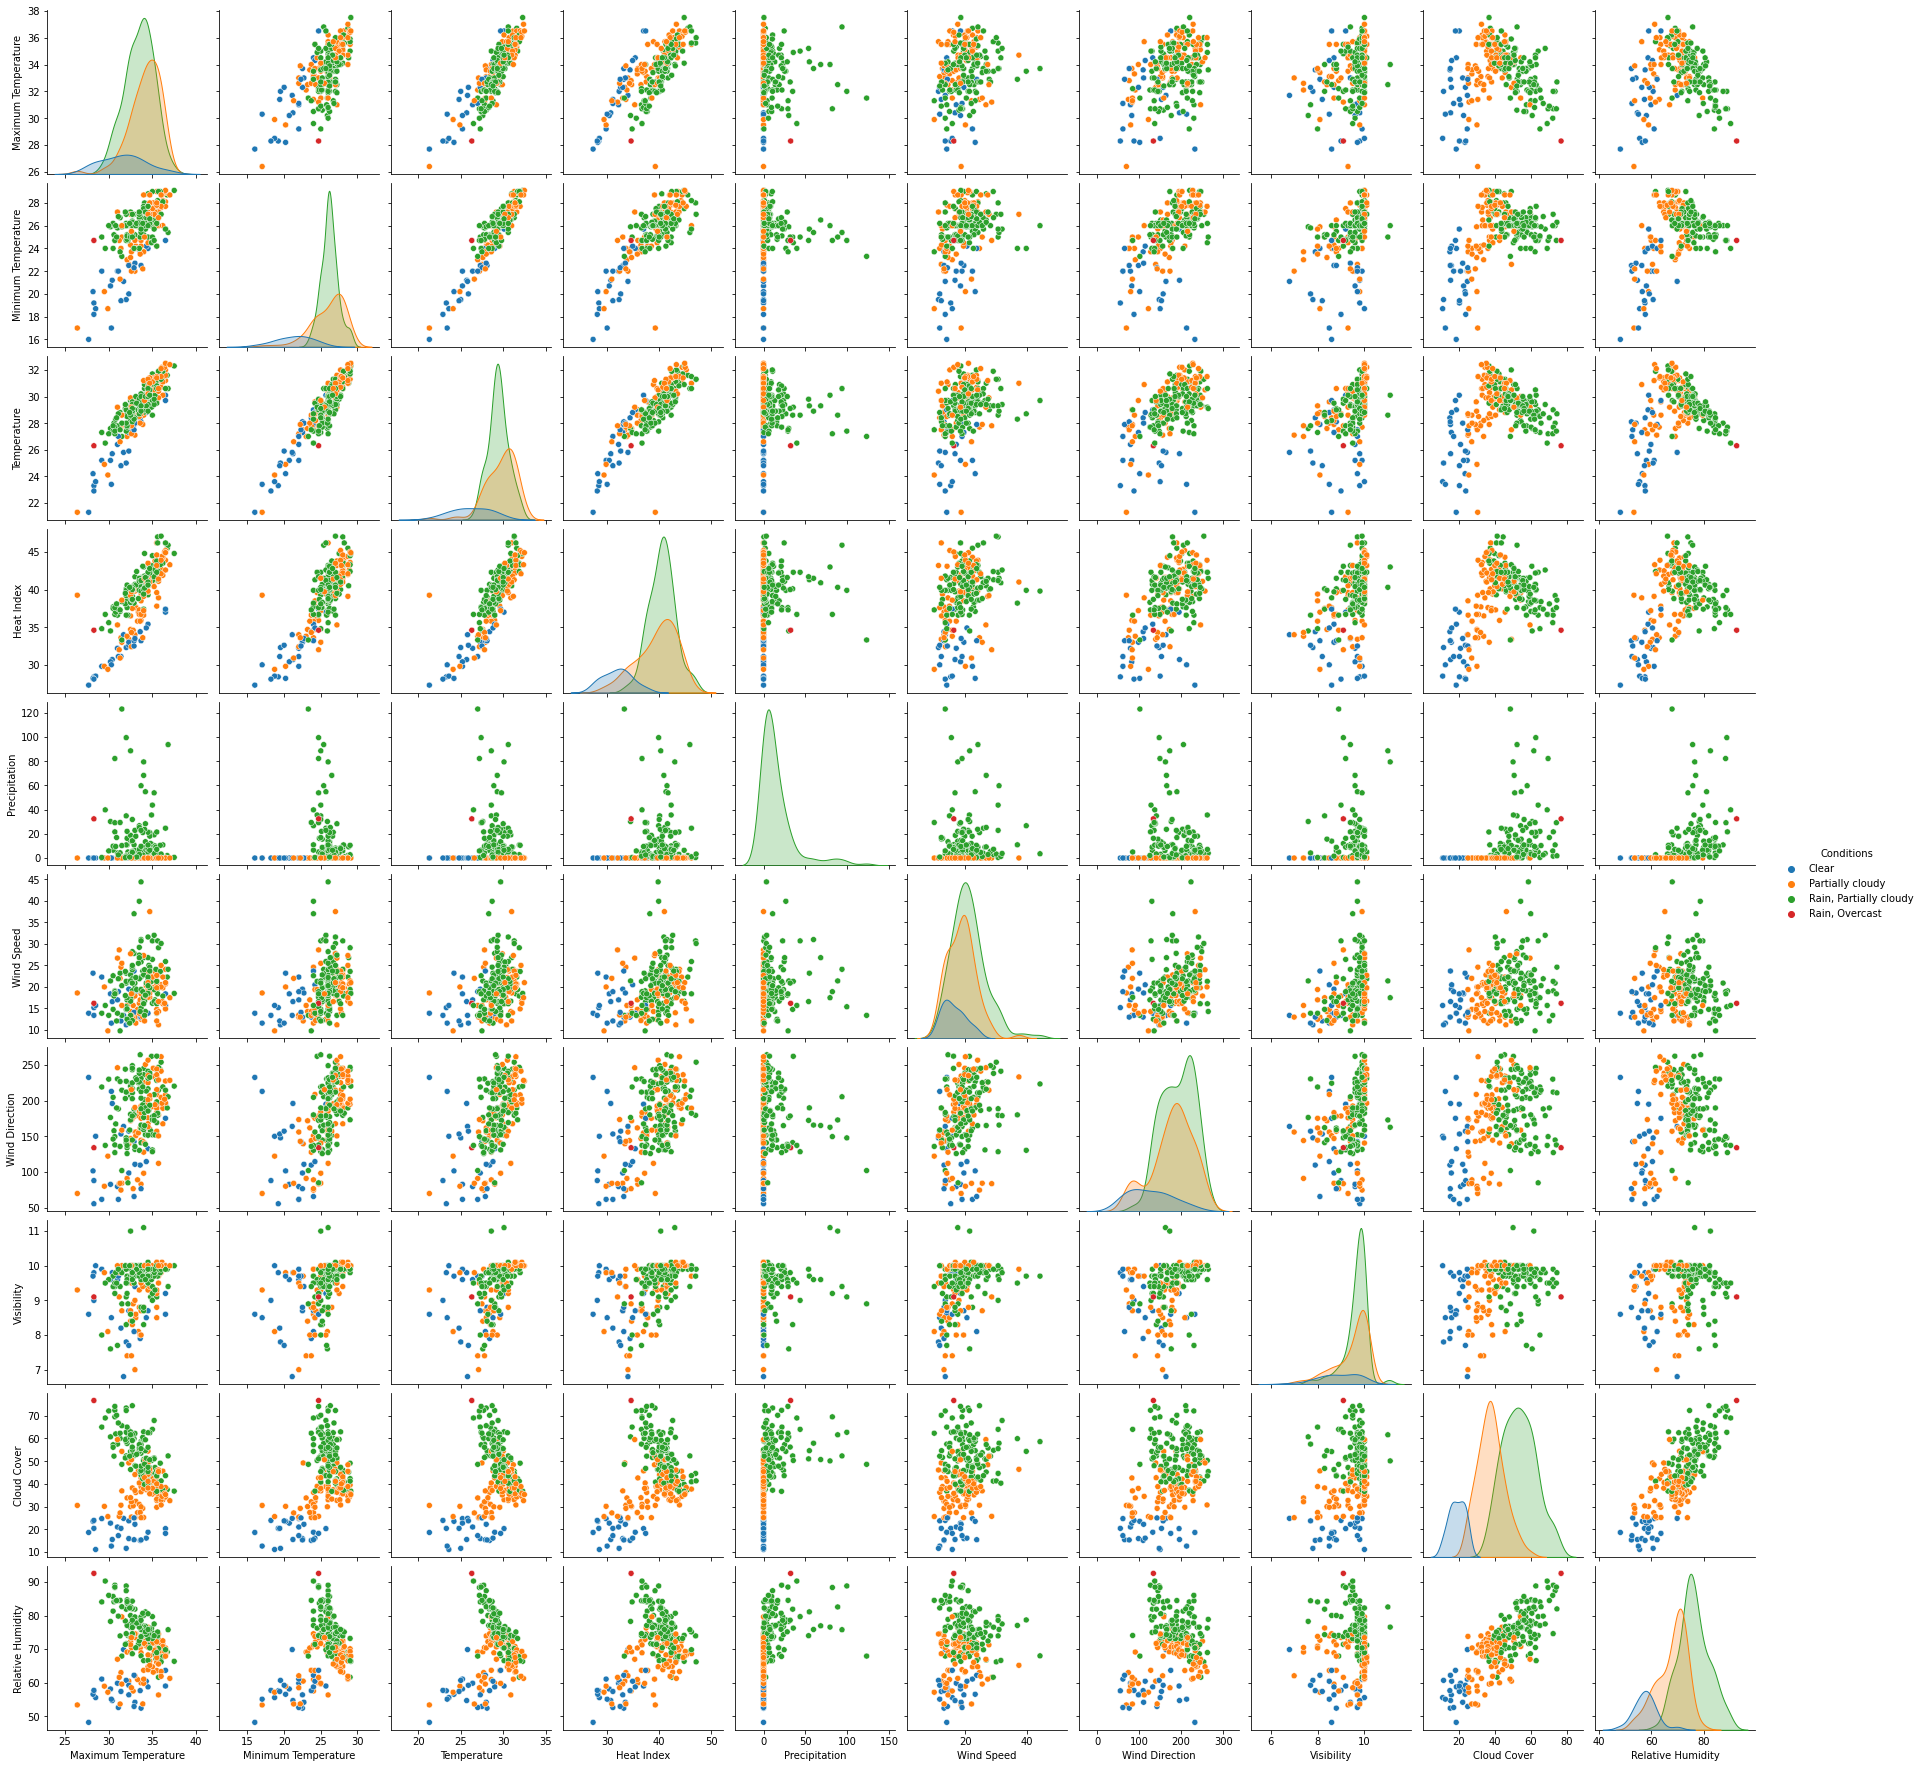

In [18]:
sns.pairplot(dataset, hue='Conditions')

###Build Model


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
X = dataset.iloc[:,2:12].values
y = dataset.iloc[:, 12].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [56]:
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9  0  0]
 [ 1 29  0]
 [ 0  0 34]]
                        precision    recall  f1-score   support

                 Clear       0.90      1.00      0.95         9
      Partially cloudy       1.00      0.97      0.98        30
Rain, Partially cloudy       1.00      1.00      1.00        34

              accuracy                           0.99        73
             macro avg       0.97      0.99      0.98        73
          weighted avg       0.99      0.99      0.99        73



In [61]:
print("Test new example")
z_test = [[28.3	, 19.2, 23.3, 28.4, 0.0, 15.2, 55.42, 9.8, 20.4, 57.56]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

z_test = [[32.3,	22.6,27.5,	33.4,	0.0,	12.1,	139.48,	9.7,	49.2,	60.45]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

Test new example
['Rain, Overcast']
['Rain, Overcast']


###Clustering